<a href="https://colab.research.google.com/github/aysha-tallat/CNN_fashion_mnist/blob/main/CNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D



In [ ]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7332171494336809960
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5064202224389952113
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


# Load and Split Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# View a Chunk of Dataset

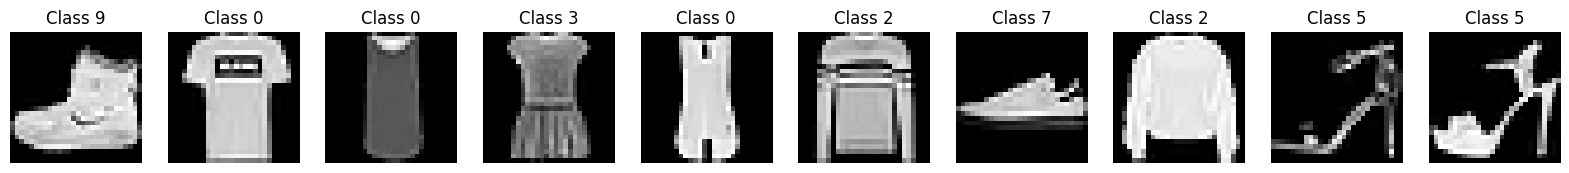

In [ ]:
n=10
plt.figure(figsize=(20,5))
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.gray()
    plt.title('Class {}'.format(y_train[i]))
    plt.axis('off')
plt.show()
plt.close()

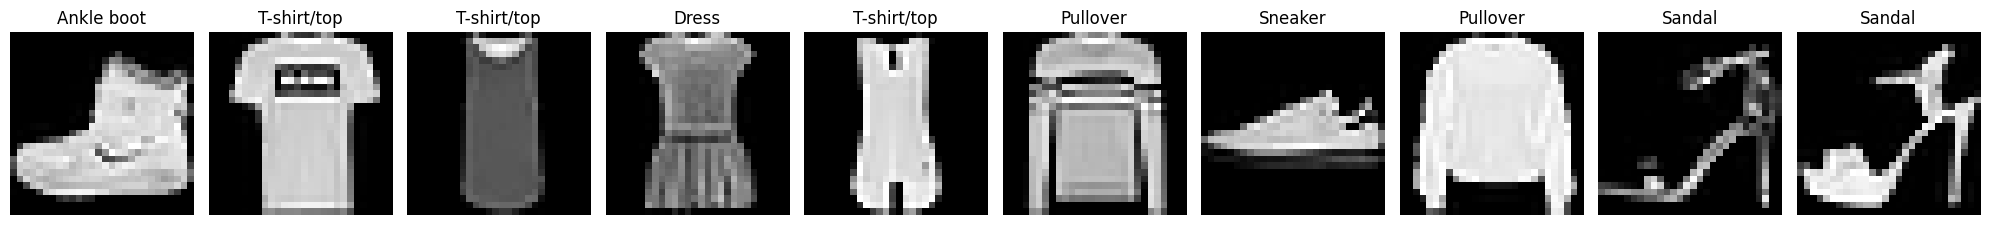

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(20, 4))
for i in range(10):
  image = x_train[i]
  label = y_train[i]
  image = image / 255.0
  plt.subplot(1, n, i+1)
  plt.imshow(image, cmap='gray')
  plt.title(class_names[label])
  plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()


# Flatten the Image

In [ ]:
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (60000, 28, 28)
y_train Shape : (60000,)
x_test Shape : (10000, 28, 28)
y_test Shape : (10000,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

# One-Hot Encoding of Labels

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (60000, 28, 28, 1)
y_train Shape : (60000, 10)
x_test Shape : (10000, 28, 28, 1)
y_test Shape : (10000, 10)


# Building the CNN

In [ ]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
filters = [8, 32, 64, 128]
classes = 10

In [ ]:
model = Sequential()
model.add(Conv2D(filters=filters[0],kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=filters[1],kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=filters[2],kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=filters[3],kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(classes,activation='softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        2336      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 64)         

In [ ]:
model.fit(x_train, y_train, validation_split= 0.2, epochs=15, batch_size=128, verbose=1)

Epoch 1/15
375/375 [==============================] - 4s 7ms/step - loss: 1.9742 - accuracy: 0.3648 - val_loss: 1.1631 - val_accuracy: 0.4978
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.9267 - accuracy: 0.6443 - val_loss: 0.8463 - val_accuracy: 0.6578
Epoch 3/15
375/375 [==============================] - 3s 8ms/step - loss: 0.7804 - accuracy: 0.7063 - val_loss: 0.7663 - val_accuracy: 0.6891
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.7033 - accuracy: 0.7372 - val_loss: 0.6735 - val_accuracy: 0.7303
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.6450 - accuracy: 0.7609 - val_loss: 0.6027 - val_accuracy: 0.7756
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.5986 - accuracy: 0.7776 - val_loss: 0.5502 - val_accuracy: 0.7924
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.5647 - accuracy: 0.7923 - val_loss: 0.5171 - val_accuracy: 0.8098
Epoch 

# Model Evaluation

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4253 - accuracy: 0.8464


[0.4252760708332062, 0.8464000225067139]

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)


test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.8129


In [ ]:
mask = range(20, 50)

X_valid = x_test[20:40]
actual_labels = y_test[20:40]

y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 [==============================] - 0s 23ms/step


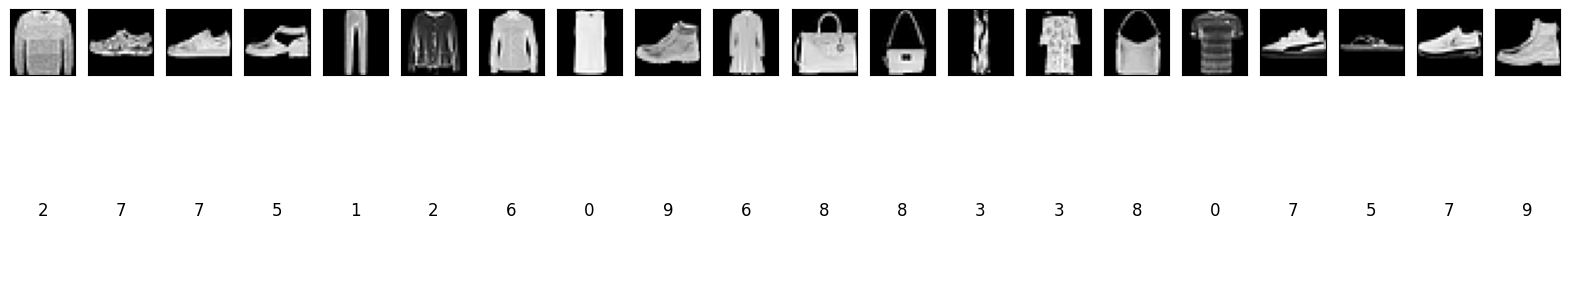

In [ ]:
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')
plt.show()
plt.close()